## 🌟 Problem Statement
To design and implement a Feed-Forward Neural Network (FNN) using Keras on top of TensorFlow. The model should be trained and evaluated on either MNIST or CIFAR-10, using Stochastic Gradient Descent (SGD) as the optimizer. <p>

## ✦ Description of the Problem
Feed-Forward Neural Networks are among the simplest neural architectures used for classification tasks. This assignment focuses on understanding the workflow of deep learning model development using Keras: package import, dataset loading, architecture definition, model compilation, training with SGD, and visualizing accuracy and loss curves. <p>

## ✦ Program Details
- Import TensorFlow and Keras modules <br>
- Load MNIST or CIFAR-10 dataset <br>
- Normalize and preprocess the data <br>
- Define a multi-layer FNN architecture <br>
- Compile the model with SGD optimizer <br>
- Train the network <br>
- Evaluate accuracy and test loss <br>
- Plot training/validation accuracy and loss over epochs <br>

In [41]:
# Import TensorFlow and relevant libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D, Input
import matplotlib.pyplot as plt
import numpy as np


In [42]:
# Define the paths to the training and testing data directories
train_data_dir = r"/Users/mel/Desktop/mnist-dataset/train"
test_data_dir = r"/Users/mel/Desktop/mnist-dataset/test"

In [43]:
# Set up an ImageDataGenerator to rescale pixel values to [0, 1]
image_data_generator = ImageDataGenerator(rescale=1.0/255)

# Define batch sizes
train_batch_size = 1000
test_batch_size = 700

# Create data generators for training and testing
train_generator = image_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(28, 28),  # Resize images to 28x28 pixels
    batch_size=train_batch_size,  # Number of images per training batch
    class_mode='categorical',  # One-hot encoded labels
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=True,  # Shuffle the order of images during training
)

test_generator = image_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(28, 28),  # Resize images to 28x28 pixels
    batch_size=test_batch_size,  # Number of images per testing batch
    class_mode='categorical',  # One-hot encoded labels
    color_mode='grayscale',  # Convert images to grayscale
    shuffle=True,  # Shuffle the order of images during testing
)

Found 60000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [44]:
x_train, y_train = train_generator[0]
x_test, y_test = test_generator[0]

In [45]:
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")

Shape of X_train (1000, 28, 28, 1)
Shape of y_train (1000, 10)
Shape of x_test  (700, 28, 28, 1)
Shape of y_test  (700, 10)


In [46]:
model = keras.Sequential([
    Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(50,activation='relu',name='L1'),
    keras.layers.Dense(50,activation='relu',name='L2'),
    keras.layers.Dense(10,activation='softmax',name='L3')
])

In [47]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=10, shuffle=True)

Epoch 1/10


2025-11-16 15:33:24.680178: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1377 - loss: 2.2530 - val_accuracy: 0.4857 - val_loss: 1.8644
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5390 - loss: 1.7361 - val_accuracy: 0.6543 - val_loss: 1.3595
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6837 - loss: 1.2327 - val_accuracy: 0.7486 - val_loss: 1.0059
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7877 - loss: 0.8917 - val_accuracy: 0.7786 - val_loss: 0.8451
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8165 - loss: 0.7365 - val_accuracy: 0.8086 - val_loss: 0.7122
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8499 - loss: 0.5626 - val_accuracy: 0.8271 - val_loss: 0.6369
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9065 - loss: 0.4673 - val_accuracy: 0.8300 - val_loss: 0.6029
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8859 - loss: 0.4172 - val_accuracy: 0.842

<Axes: >

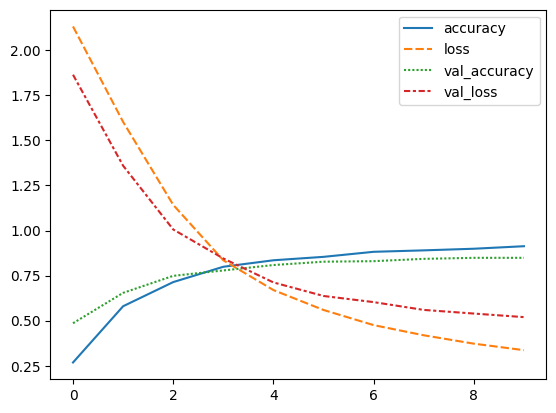

In [48]:
import seaborn as sns
sns.lineplot(model.history.history)

In [49]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ", test_acc)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8388 - loss: 0.5562
Loss:  0.5196202397346497
Accuracy:  0.8485714197158813


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


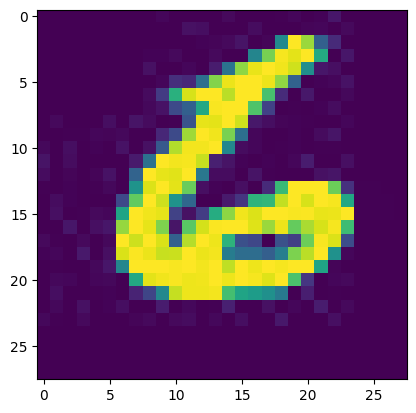

6


In [50]:
predicted_value=model.predict(x_test)
plt.imshow(x_test[42])
plt.show()
print(np.argmax(predicted_value[42], axis=0))